In [1]:
import os
import glob
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sql_queries import *
%matplotlib inline

In [2]:
conn = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")
cur = conn.cursor()
conn.set_session(autocommit=True)

## Check that all song file data is in database

### Unique song_ids in inputs

In [3]:
filepath='data/song_data'
all_files = []
for root, dirs, files in os.walk(filepath):
    files = glob.glob(os.path.join(root,'*.json'))
    for f in files :
        all_files.append(os.path.abspath(f))

# get total number of files found
num_files = len(all_files)
print('{} files found in {}'.format(num_files, filepath))

artist_ids = set()
song_ids = set()
# iterate over files and process
for i, datafile in enumerate(all_files, 1):
    df = pd.read_json(datafile, lines=True)
    song_ids.add(df.song_id.values[0])
    artist_ids.add(df.artist_id.values[0])
print ('\n{} song IDs found in input data'.format(len(song_ids)))
print ('\n{} artist IDs found in input data'.format(len(artist_ids)))
song_df = pd.DataFrame(data={
    'tbl': ['RAW DATA'],
    'count': [len(song_ids)]
})
artist_df = pd.DataFrame(data={
    'tbl': ['RAW DATA'],
    'count': [len(artist_ids)]
})

song_df

71 files found in data/song_data

71 song IDs found in input data

69 artist IDs found in input data


,tbl,count
0,RAW DATA,71


### Unique song_ids in database

In [4]:
try: 
    cur.execute("""
    SELECT 'SONG TABLE' as tbl, COUNT(DISTINCT song_id) from songs
    union all 
    SELECT 'SONGPLAY TABLE' as tbl, COUNT(DISTINCT song_id) from songplays
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
df.head()
pd.concat([song_df, df])

,tbl,count
0,RAW DATA,71
0,SONG TABLE,71
1,SONGPLAY TABLE,1


In [5]:
try: 
    cur.execute("""
    SELECT 'SONGPLAY TABLE' as tbl, COUNT(DISTINCT artist_id) from songplays
    union all
    SELECT 'ARTIST TABLE' as tbl, COUNT(DISTINCT artist_id) from artists
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
df.head()

artist_df = pd.DataFrame(data={
    'tbl': ['RAW DATA'],
    'count': [len(artist_ids)]
})
pd.concat([artist_df,df])

,tbl,count
0,RAW DATA,69
0,SONGPLAY TABLE,1
1,ARTIST TABLE,69


# Check that all log data is in the database

#### Values to check:
1. session_id
1. user_id
1. timstamps

### Get log data

In [6]:
filepath='data/log_data'
all_files = []
for root, dirs, files in os.walk(filepath):
    files = glob.glob(os.path.join(root,'*.json'))
    for f in files :
        all_files.append(os.path.abspath(f))

# get total number of files found
num_files = len(all_files)
print('{} files found in {}'.format(num_files, filepath))

session_ids = set()
user_ids = set()
timestamps = set()

# iterate over files and process
for i, datafile in enumerate(all_files, 1):
    df = pd.read_json(datafile, lines=True)
    df = df[(df.page=='NextSong')]
    session_ids = session_ids.union(set(df.sessionId.values))
    user_ids = user_ids.union(set(df.userId.values))
    timestamps = timestamps.union(set(df.ts.values))
user_ids = {int(i) for i in user_ids}
print ('\n{} session IDs found in input data'.format(len(session_ids)))
print ('\n{} user IDs found in input data'.format(len(user_ids)))
print ('\n{} timestamps found in input data'.format(len(timestamps)))




30 files found in data/log_data

776 session IDs found in input data

96 user IDs found in input data

6813 timestamps found in input data


#### Check database for session IDs

In [7]:
try: 
    cur.execute("""
    SELECT 'SONGPLAY TABLE' as tbl, COUNT(DISTINCT session_id) from songplays
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
df.head()

session_df = pd.DataFrame(data={
    'tbl': ['RAW DATA'],
    'count': [len(session_ids)]
})
pd.concat([session_df,df])

,tbl,count
0,RAW DATA,776
0,SONGPLAY TABLE,776


#### Check database for user IDs

In [8]:
try: 
    cur.execute("""
    SELECT 'SONGPLAY TABLE' as tbl, COUNT(DISTINCT user_id) from songplays
    union all
    SELECT 'USER TABLE' as tbl, COUNT(DISTINCT user_id) from users
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
df.head()

user_df = pd.DataFrame(data={
    'tbl': ['RAW DATA'],
    'count': [len(user_ids)]
})
pd.concat([user_df,df])

,tbl,count
0,RAW DATA,96
0,SONGPLAY TABLE,96
1,USER TABLE,96


#### Check database for session IDs

In [9]:
try: 
    cur.execute("""
    SELECT 'SONGPLAY TABLE' as tbl, COUNT(DISTINCT session_id) from songplays
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
df.head()

session_df = pd.DataFrame(data={
    'tbl': ['RAW DATA'],
    'count': [len(session_ids)]
})
pd.concat([session_df,df])

,tbl,count
0,RAW DATA,776
0,SONGPLAY TABLE,776


#### Check database for tomestamps

In [10]:
try: 
    cur.execute("""
    SELECT 'SONGPLAY TABLE' as tbl, COUNT(DISTINCT start_time) from songplays
    union all
    SELECT 'TIME TABLE' as tbl, COUNT(DISTINCT start_time) from time
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
df.head()

time_df = pd.DataFrame(data={
    'tbl': ['RAW DATA'],
    'count': [len(timestamps)]
})
pd.concat([time_df,df])

,tbl,count
0,RAW DATA,6813
0,SONGPLAY TABLE,6813
1,TIME TABLE,6813


In [11]:
try: 
    cur.execute("""
    SELECT start_time from time
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
df.head()


,start_time
0,2018-11-29 00:00:57.796
1,2018-11-29 00:01:30.796
2,2018-11-29 00:04:01.796
3,2018-11-29 00:04:55.796
4,2018-11-29 00:07:13.796


Text(0.5,0.98,'Sessions per User')

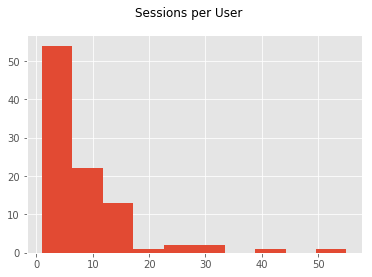

In [13]:
try: 
    cur.execute("""
    SELECT user_id, count(distinct session_id) from songplays
    group by user_id
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
# df.head()
df['count'].hist()
plt.suptitle('Sessions per User')

Text(0.5,0.98,'Users per location')

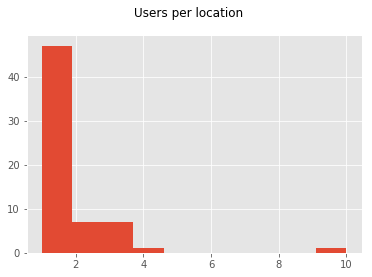

In [14]:
try: 
    cur.execute("""
    SELECT location, count(distinct user_id) from songplays
    group by location
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
# df.head()
df['count'].hist(bins=10)
plt.suptitle('Users per location')

Text(0.5,0.98,'User level split')

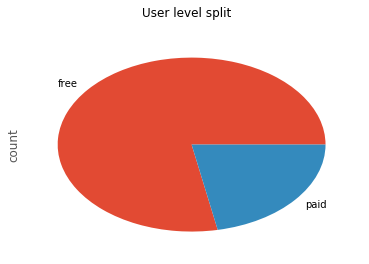

In [15]:
try: 
    cur.execute("""
    SELECT level, count(distinct user_id) from users
    group by level
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
# df.head()
df['count'].plot(kind='pie', labels=df.level)
plt.suptitle('User level split')

Text(0.5,0.98,'User gender split')

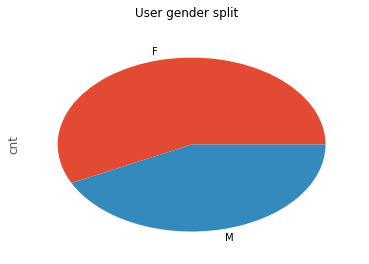

In [17]:
try: 
    cur.execute("""
    SELECT gender, COUNT(distinct user_id) as cnt
    FROM users 
    GROUP BY gender
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
# df.head()
df['cnt'].plot(kind='pie', labels=df.gender)
plt.suptitle('User gender split')

Text(0.5,0.98,'Useage by day of week')

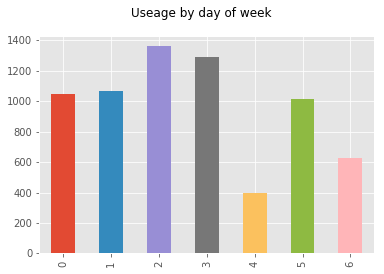

In [18]:
try: 
    cur.execute("""
    SELECT weekday, count(*) from time
    group by weekday
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
# df.head()
df['count'].plot(kind='bar')
plt.suptitle('Useage by day of week')

Text(0.5,0.98,'Useage by day of hour')

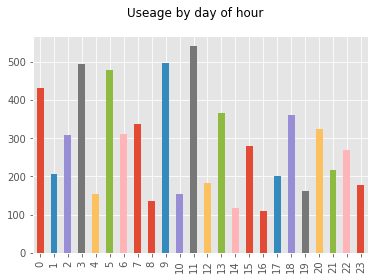

In [19]:
try: 
    cur.execute("""
    SELECT hour, count(*) from time
    group by hour
    
    
    """)
except psycopg2.Error as e: 
    print("Error: Select * failure")
    print (e)
df = pd.DataFrame(cur.fetchall())
df.columns = [desc[0] for desc in cur.description]
# df.head()
df['count'].plot(kind='bar')
plt.suptitle('Useage by day of hour')